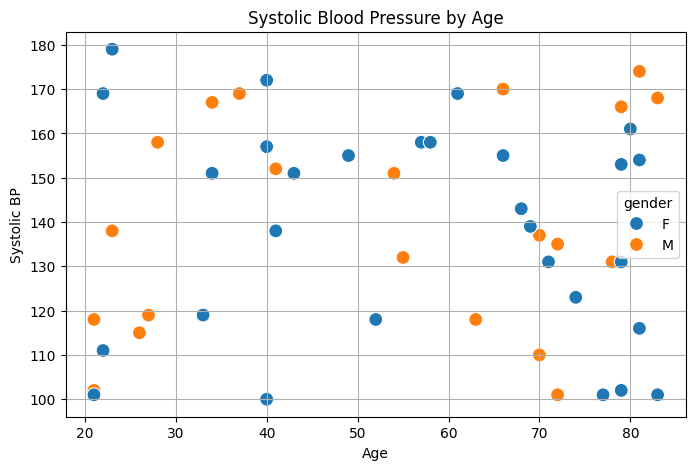

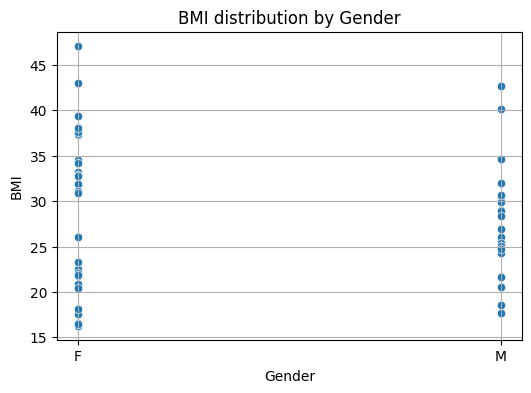

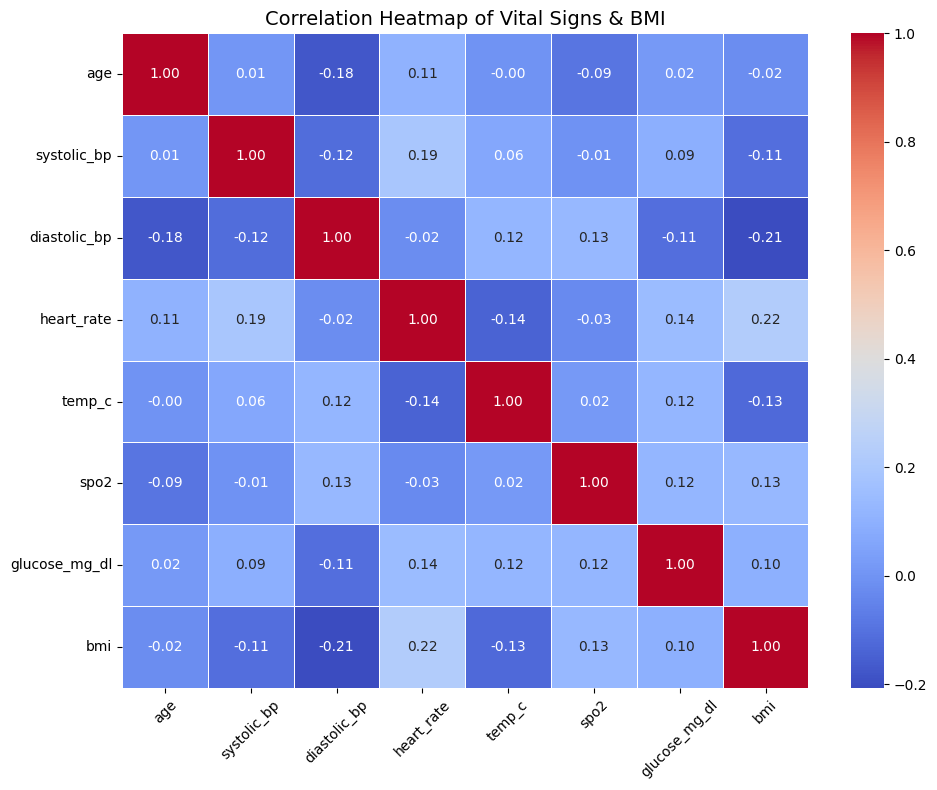

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

patients = pd.read_csv("/Users/eueanastasiou/Documents/GitHub/clinical-data-dashboard/data/patients.csv", delimiter=';')
vitals = pd.read_csv("/Users/eueanastasiou/Documents/GitHub/clinical-data-dashboard/data/vitals.csv", delimiter=';')

df = pd.merge(vitals, patients, on = 'patient_id')

df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)

df['high_bp'] = (df['systolic_bp'] > 140) | (df['diastolic_bp'] > 90)

df.head()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='systolic_bp', hue='gender', s=100)
plt.title("Systolic Blood Pressure by Age")
plt.xlabel("Age")
plt.ylabel("Systolic BP")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='gender', y='bmi')
plt.title("BMI distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.grid(True)
plt.show()


corr_features = ['age', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'temp_c', 'spo2', 'glucose_mg_dl', 'bmi']
corr_matrix = df[corr_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Vital Signs & BMI", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Total high-risk patients 38


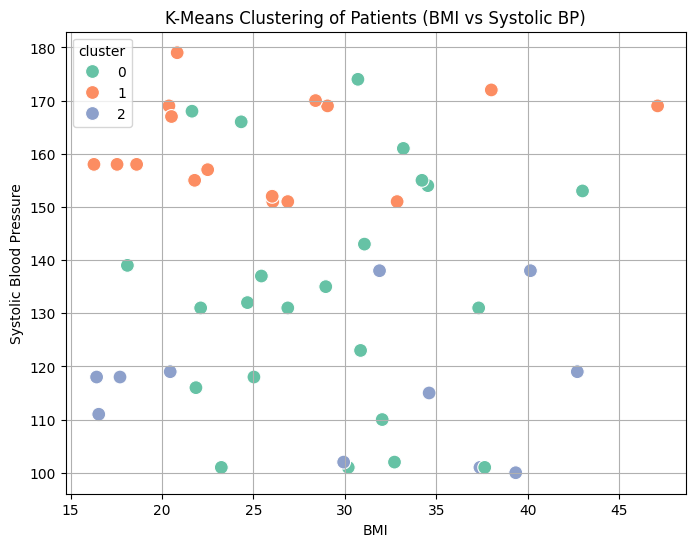

,age,bmi,systolic_bp,glucose_mg_dl
cluster,,,,
0,74.347826,29.123569,134.000000,131.347826
1,42.937500,25.803850,161.625000,135.250000
2,29.727273,29.743954,116.272727,126.545455


In [2]:
df['risk_score'] = (
    (df['systolic_bp'] > 140).astype(int) +
    (df['diastolic_bp'] > 90).astype(int) +
    (df['bmi'] > 30).astype(int) +
    (df['glucose_mg_dl'] > 126).astype(int) +
    (df['age'] > 65).astype(int)
)

df['high_risk'] = df['risk_score'] >= 2
high_risk_df = df[df['high_risk'] == True]

print(f"Total high-risk patients {high_risk_df.shape[0]}")
high_risk_df[['name', 'age', 'systolic_bp', 'diastolic_bp', 'bmi', 'glucose_mg_dl', 'risk_score']]

features = ['age', 'bmi', 'systolic_bp', 'glucose_mg_dl']
X = df[features]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['bmi'],
    y=df['systolic_bp'],
    hue=df['cluster'],
    palette='Set2',
    s=100
)
plt.title("K-Means Clustering of Patients (BMI vs Systolic BP)")
plt.xlabel("BMI")
plt.ylabel("Systolic Blood Pressure")
plt.grid(True)
plt.show()

df.groupby('cluster')[features].mean()